In [1]:
# import common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Environment description
rewards={(0,3):1,(1,3):-1}

actions={
    (2,0):['U','R'],
    (1,0):['U','D'],
    (0,0):['R','D'],
    (2,1):['R','L'],
    (0,1):['R','L'],
    (2,2):['U','R','L'],
    (1,2):['U','D','R'],
    (0,2):['R','L','D'],
    (2,3):['L'],
}

probs = {
    ((2, 0), 'U'): {(1, 0): 1.0},
    ((2, 0), 'D'): {(2, 0): 1.0},
    ((2, 0), 'L'): {(2, 0): 1.0},
    ((2, 0), 'R'): {(2, 1): 1.0},
    ((1, 0), 'U'): {(0, 0): 1.0},
    ((1, 0), 'D'): {(2, 0): 1.0},
    ((1, 0), 'L'): {(1, 0): 1.0},
    ((1, 0), 'R'): {(1, 0): 1.0},
    ((0, 0), 'U'): {(0, 0): 1.0},
    ((0, 0), 'D'): {(1, 0): 1.0},
    ((0, 0), 'L'): {(0, 0): 1.0},
    ((0, 0), 'R'): {(0, 1): 1.0},
    ((0, 1), 'U'): {(0, 1): 1.0},
    ((0, 1), 'D'): {(0, 1): 1.0},
    ((0, 1), 'L'): {(0, 0): 1.0},
    ((0, 1), 'R'): {(0, 2): 1.0},
    ((0, 2), 'U'): {(0, 2): 1.0},
    ((0, 2), 'D'): {(1, 2): 1.0},
    ((0, 2), 'L'): {(0, 1): 1.0},
    ((0, 2), 'R'): {(0, 3): 1.0},
    ((2, 1), 'U'): {(2, 1): 1.0},
    ((2, 1), 'D'): {(2, 1): 1.0},
    ((2, 1), 'L'): {(2, 0): 1.0},
    ((2, 1), 'R'): {(2, 2): 1.0},
    ((2, 2), 'U'): {(1, 2): 1.0},
    ((2, 2), 'D'): {(2, 2): 1.0},
    ((2, 2), 'L'): {(2, 1): 1.0},
    ((2, 2), 'R'): {(2, 3): 1.0},
    ((2, 3), 'U'): {(1, 3): 1.0},
    ((2, 3), 'D'): {(2, 3): 1.0},
    ((2, 3), 'L'): {(2, 2): 1.0},
    ((2, 3), 'R'): {(2, 3): 1.0},
    ((1, 2), 'U'): {(0, 2): 0.5, (1, 3): 0.5},
    ((1, 2), 'D'): {(2, 2): 1.0},
    ((1, 2), 'L'): {(1, 2): 1.0},
    ((1, 2), 'R'): {(1, 3): 1.0},
  }

policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'R',
    (2, 1): 'R',
    (2, 2): 'R',
    (2, 3): 'U'
  }

In [3]:
# define the gridworld  class
class WindyGridWorld():
    
    def __init__(self, rows, columns, start_position):
        self.rows = rows
        self.columns = columns
        #self.all_states = [(i,j) for i in range(rows) for j in range(columns)]
        self.i = start_position[0]
        self.j = start_position[1]
        
    def set_rewards_actions(self, rewards, actions, probs):
        self.rewards = rewards
        self.actions = actions
        self.probs = probs
        self.all_states = set(self.actions.keys()) | set(self.rewards.keys())
        #print (self.all_states)
    
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
    
    def current_state(self):
        return self.i,self.j
    
    def reset(self):
        self.i = 2
        self.j = 0
        return self.current_state()
    
    def undo_move(self, action):
        if action in self.actions[(self.i,self.j)]:
            if action == 'U':
                self.i += 1
            elif action == 'R':
                self.j -= 1
            elif action == 'L':
                self.j += 1
            else:
                self.i -= 1
        # should never happen
        assert (self.current_state() in self.all_states)
 
    def move(self, action):
        cur_state = (self.i, self.j)
        a = action
        next_action_prob = self.probs[(cur_state,a)]
        next_actions = list(next_action_prob.keys())
        next_probs = list(next_action_prob.values())
        next_state_idx = np.random.choice(len(next_actions), p=next_probs)
        self.i = next_actions[next_state_idx][0]
        self.j = next_actions[next_state_idx][1]
        return self.rewards.get((self.i,self.j),0)

    def is_terminal (self, s):
        return s not in self.actions
    
    def game_over(self):
        return (self.i,self.j) in self.actions

In [4]:
# define the gridworld  class
class GridWorld():
    
    def __init__(self, rows, columns, start_position):
        self.rows = rows
        self.columns = columns
        #self.all_states = [(i,j) for i in range(rows) for j in range(columns)]
        self.i = start_position[0]
        self.j = start_position[1]
        
    def set_rewards_actions(self, rewards, actions):
        self.rewards = rewards
        self.actions = actions
        self.all_states = set(self.actions.keys()) | set(self.rewards.keys())
        print (self.all_states)
    
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
    
    def current_state(self):
        return self.i,self.j

    def reset(self):
        self.i = 2
        self.j = 0
        return self.current_state()
    
    def get_next_state(self, s, a):
        i, j = s[0], s[1]
        #print(f"s : ({i},{j})")
        #print(a)
        #print(self.actions[(i,j)])
        if a in self.actions[(i,j)]:
            if a == 'U':
                i -= 1
            elif a == 'R':
                j += 1
            elif a == 'L':
                j -= 1
            else:
                i += 1
        #print(f"s2 : ({i},{j})")
        return i,j
    
    def undo_move(self, action):
        if action in self.actions[(self.i,self.j)]:
            if action == 'U':
                self.i += 1
            elif action == 'R':
                self.j -= 1
            elif action == 'L':
                self.j += 1
            else:
                self.i -= 1
        # should never happen
        assert (self.current_state() in self.all_states)
 
    def move(self, action):
        if action in self.actions[(self.i,self.j)]:
            if action == 'U':
                self.i -= 1
            elif action == 'R':
                self.j += 1
            elif action == 'L':
                self.j -= 1
            else:
                self.i += 1
        return self.rewards.get((self.i,self.j),0)

    def is_terminal (self, s):
        return s not in self.actions
    
    def game_over(self):
        return (self.i,self.j) in self.actions

In [5]:
def print_values(V,g):
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.columns):
            v = V.get((i,j),0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="")
        print ("")

def print_policy(P,g):
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.columns):
            a = P.get((i,j),' ')
            print(" %s |" % a, end="")
        print ("")

ACTION_SPACE = ('U', 'D', 'L', 'R')

def init_windy_grid_world_penalized(step_cost, start):
    grid = WindyGridWorld(3,4,start)
    rewards = {
        (2,0):step_cost,
        (1,0):step_cost,
        (0,0):step_cost,
        (2,1):step_cost,
        (0,1):step_cost,
        (2,2):step_cost,
        (1,2):step_cost,
        (0,2):step_cost,
        (2,3):step_cost,
        (0,3):1,
        (1,3):-1
    }
    grid.set_rewards_actions(rewards, actions, probs)
    return grid

def max_dict(d):
    '''
    return the argmax and max value from a dictionnary
    '''
    max_val = max(d.values())
    max_keys = [key for key, val in d.items() if val == max_val]
    return np.random.choice(max_keys), max_val

def epsilon_greedy(Q, state, eps=0.1):
    '''
    return an actions based on the epsilon greedy concept : exploration vs exploitation
    random action if < epx else best action
    '''
    p = np.random.random()
    if p < eps:
        a = np.random.choice(ACTION_SPACE)
    else:
        a = Q[state]
    return a
    

In [6]:
SMALL_ENOUGH = 1e-3

def main(step_cost, tot_iteration):
    
    gamma = 0.9    
    ALPHA = 0.1
        
    # initialize G and returns
    #g = init_grid_world_penalized(step_cost, (2,0))
    g = GridWorld(3,4,(2,0))
    g.set_rewards_actions(rewards=rewards, actions=actions)
    
    print(f"rewards : ")
    print_values(g.rewards,g)
    
    # use the given policy
    
    # initialize Q(s,a) and returns
    V = {}
    state_sample_count = {}
    states = g.all_states
    for s in states:
        V[s]=0
        state_sample_count[s]=0 
      
    # repeat until convergence
    deltas = []
    #loop on tot_iteration
    for t in range(tot_iteration):
        if t % 1000 == 0:
            print(t)
      
        # play one game based on a random policy
        biggest_change = 0
        #print_policy(policy,g)
        
        cur_s = g.reset()
        
        #compute V based on rewards and next state
        while g.game_over():
            state_sample_count[cur_s] += 1 
            a = epsilon_greedy(policy, cur_s)
            
            r = g.move(a)
            next_s = g.current_state()              
            
            v_old = V[cur_s]
            
            G = r + gamma * V[next_s]
            
            # equivalent to calculate the gradient descent - small step on w weight for convergence of the loss function 
            # with phi = id
            V[cur_s] = V[cur_s] + ALPHA * (G - V[cur_s])

            cur_s = next_s
            
            #update delta
            biggest_change = max(biggest_change, np.abs(v_old - V[cur_s]))
            deltas.append(biggest_change)
        
    plt.plot(deltas)
    plt.show()
    
    print("finale policy")
    print_policy(policy,g)
    
    # find V
    print("final values:")
    print_values(V,g)
    
    
    print("state_sample_count: ")
    state_sample_count_arr = np.zeros((g.rows, g.columns))
    for i in range(g.rows):
        for j in range(g.columns):
            if (i,j) in state_sample_count:
                state_sample_count_arr[i,j] = state_sample_count[(i,j)]
    df = pd.DataFrame(state_sample_count_arr)
    print(df)
    

{(0, 1), (1, 2), (0, 0), (1, 3), (2, 1), (2, 0), (2, 3), (2, 2), (1, 0), (0, 2), (0, 3)}
rewards : 
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


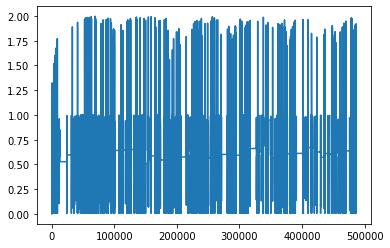

finale policy
---------------------------
 R | R | R |   |
---------------------------
 U |   | R |   |
---------------------------
 U | R | R | U |
final values:
---------------------------
 0.75| 0.84| 0.64| 0.00|
---------------------------
 0.67| 0.00|-0.95| 0.00|
---------------------------
 0.58|-0.06|-0.10|-0.01|
state_sample_count: 
         0        1        2         3
0  10823.0  10880.0  10332.0       0.0
1  10759.0      0.0    528.0       0.0
2  10812.0    544.0  11310.0  420562.0


In [7]:
main(-0.05, 10000)